In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Data/Mall_Customers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
# Select only the required columns
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
data

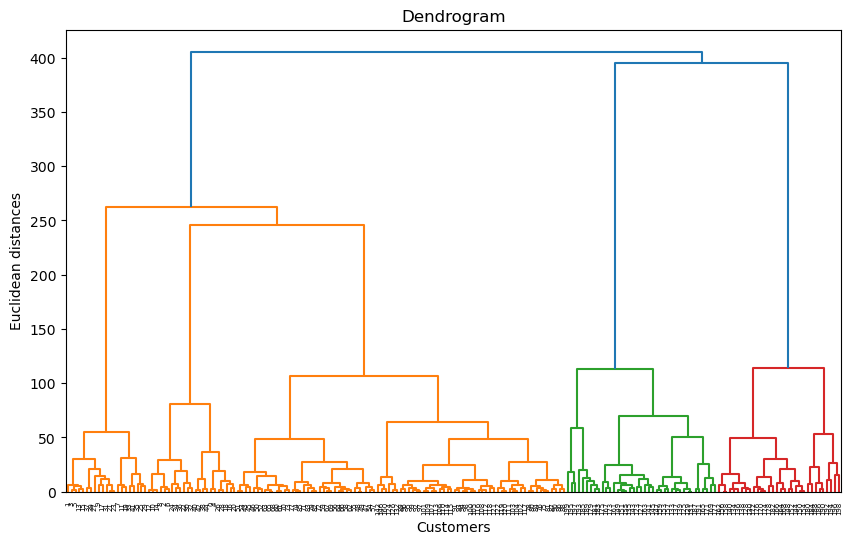

In [17]:
# Plot Dendrogram to find number of clusters
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')

import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(data,method='ward')) # used ward method to minimize variance within clusters
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
## we will choose 5 clusters based on the dendrogram

Creating Model

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')

y_pred = hc.fit_predict(data)

In [21]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Visualize The Clusters

Text(0, 0.5, 'Spending Score (1-100)')

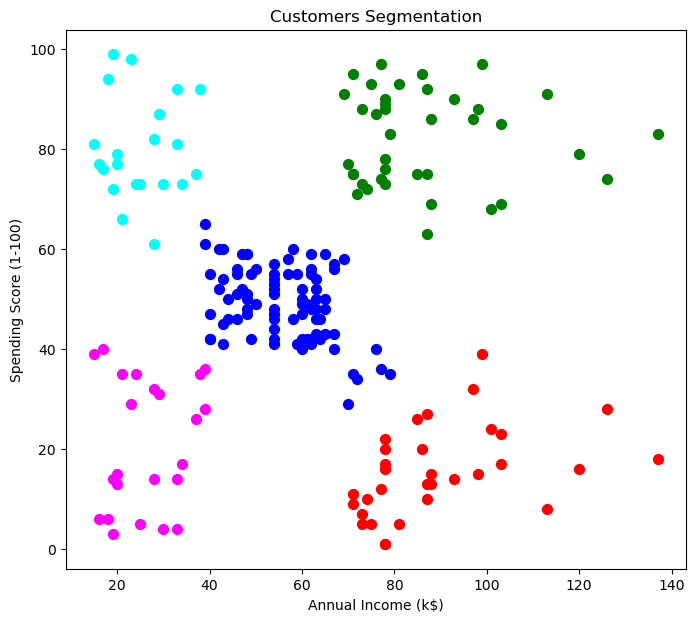

In [28]:
plt.figure(figsize=(8, 7))

plt.scatter(data[y_pred == 0,0],data[y_pred == 0,1],s=50,c='red',label='Cluster 1')
plt.scatter(data[y_pred == 1,0],data[y_pred == 1,1],s=50,c='blue',label='Cluster 2')
plt.scatter(data[y_pred == 2,0],data[y_pred == 2,1],s=50,c='green',label='Cluster 3')
plt.scatter(data[y_pred == 3,0],data[y_pred == 3,1],s=50,c='cyan',label='Cluster 4')
plt.scatter(data[y_pred == 4,0],data[y_pred == 4,1],s=50,c='magenta',label='Cluster 5')

plt.title('Customers Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')